In [1]:
import tensorflow as tf

#Load the mnist dataset into a variable
mnist = tf.keras.datasets.mnist # 28*28 images of hand written digits 0-9 

(x_train, y_train),(x_test, y_test) = mnist.load_data()  #Split the data into train and test sets

11490434/11490434 [==============================] - 2s 0us/step


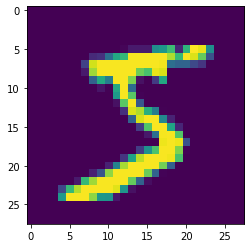

In [2]:
import matplotlib.pyplot as plt  # import matplotlib library

#print(x_train[0])   # run this command to see the pixels in the zeroth index of the train set

plt.imshow(x_train[0])   # used to show the pixels as an image, so the zeroth index has a 5 in the image
plt.show()

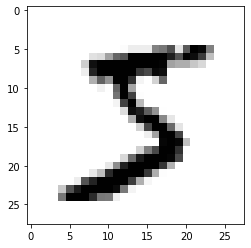

In [3]:
plt.imshow(x_train[0],cmap = plt.cm.binary) # showing the zeroth index image in black and white

In [5]:
from keras.models import Sequential                       #Sequential model is the model we'll use in this example
from keras.layers import Dense, Dropout, Conv2D, Flatten  # some keras layers which can be understood from the 
                                                          # documentation

#Normalize the data or scaling the data
x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Building up the Model
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))  # Dense layers are fully connected layers here with 128 neurons 
                                            #and relu activation layer
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # Softmax activation layer is used mostly at the end as it shows 
                                            #the probability of each node and the total equals 1 and so the 
                                            #neuron with highest probability is the prediction.

#Configuring the model before training it
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10) #Training the model with the train dataset

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2592 - accuracy: 0.9246
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1048 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0724 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0410 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0310 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0250 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0209 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0180 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [6]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)  #evaluating the model with the test set
print(val_loss,'Loss on the test set')
print(val_accuracy,'Accuracy on the test set')

313/313 [==============================] - 0s 946us/step - loss: 0.1021 - accuracy: 0.9759
0.10213583707809448 Loss on the test set
0.9758999943733215 Accuracy on the test set


In [7]:
# Save the model
model.save('mnist_save.model')

INFO:tensorflow:Assets written to: mnist_save.model\assets


In [8]:
#Loading the saved model
new_model = tf.keras.models.load_model('mnist_save.model')

In [9]:
# it requires a list to be passed as an argument
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 906us/step


7


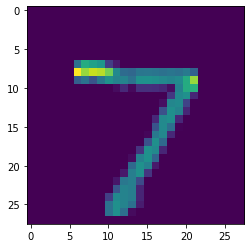

In [11]:
import numpy as np
#Checking the predicted value and the actual value
print(np.argmax(predictions[0]))  # predicted value
plt.imshow(x_test[0])     # actual value
plt.show()